<a href="https://colab.research.google.com/github/vedricopane/DataScience-AnalisaDataKorbanTitanic/blob/main/DataScience_AnalisaDataKorbanTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisa data korban Titanic dengan menggunakan Logistic Regression.**

* Connect ke googledrive :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Load data :

In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Project/Data Science/titanic.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* **Visualisasi :**

Melihat banyaknya pengelompokan korban yang selamat dan tidak selamat.

<Axes: xlabel='Survived', ylabel='count'>

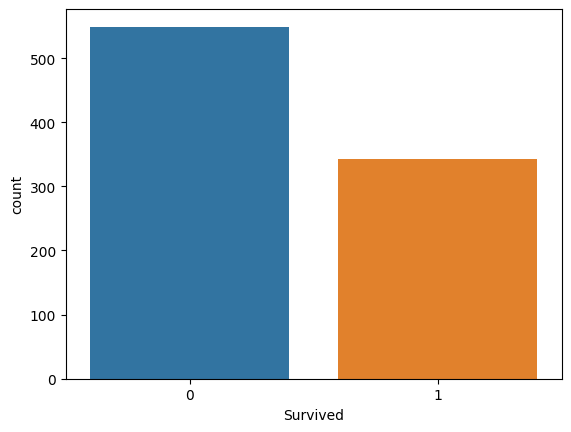

In [5]:
import seaborn as sns

sns.countplot(x='Survived', data=data)

*insight

1. Lebih banyak korban yg tidak selamat daripada korban yg selamat.

* **Visualisasi :**

Melihat hubungan antara korban yg selamat dgn jender.

<Axes: xlabel='Survived', ylabel='count'>

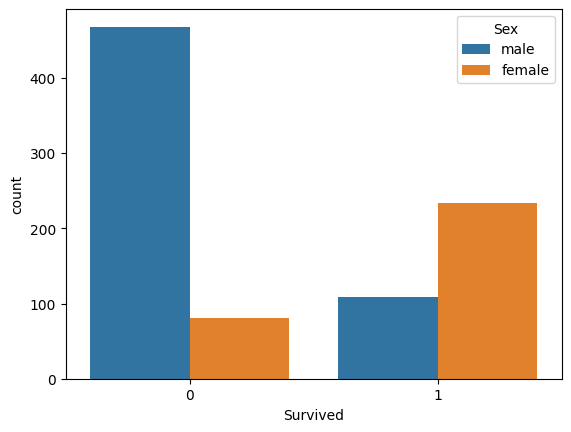

In [6]:
sns.countplot(x='Survived', hue='Sex', data=data)

*insight

1. Jender laki-laki/male lebih banyak yg tidak selamat.
2. Jender perempuan/female lebih banyak selamat.

* **Visualisasi :**

Melihat hubungan antara korban yg selamat dgn Pclass.

<Axes: xlabel='Survived', ylabel='count'>

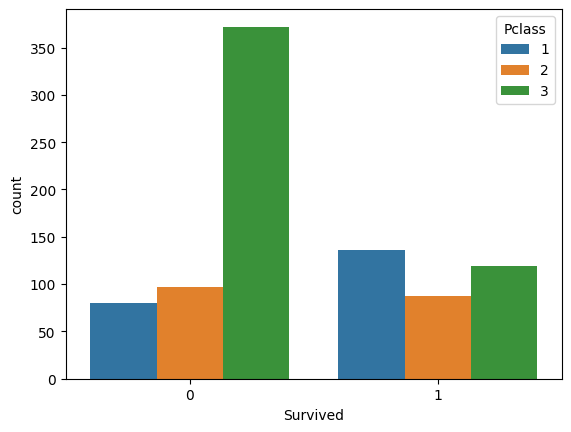

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=data)

*insight

1. Korban yg tidak selamat lebih banyak pada class ke-3.

* **Visualisasi :**

Melihat range dari sebaran umur korban.

<Axes: ylabel='Frequency'>

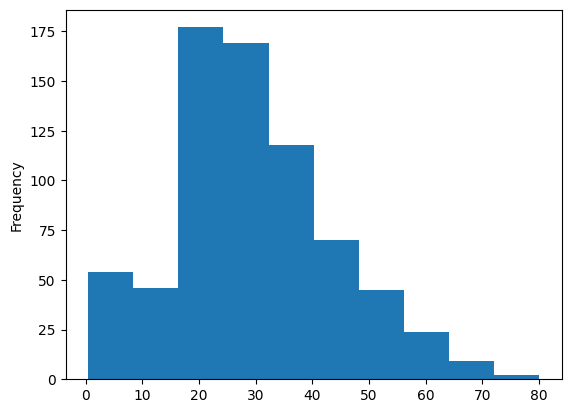

In [8]:
data['Age'].plot.hist()

*insight

1. Range umur yg paling banyak pada penumpang ialah <20 s/d 40 tahun.

* **Visualisasi :**

Melihat biaya yg harus dibayar oleh penumpang.

<Axes: ylabel='Frequency'>

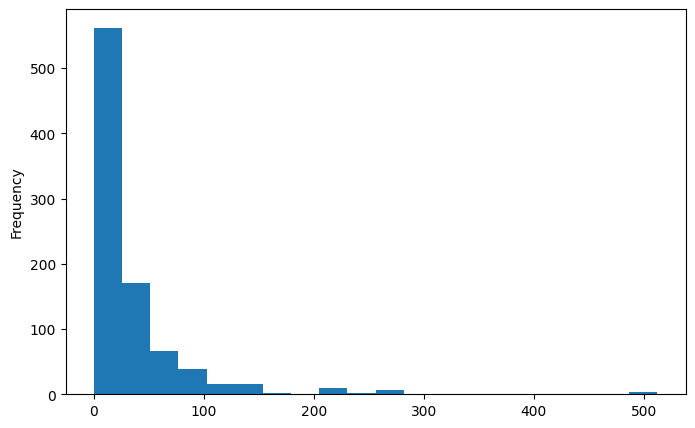

In [9]:
data['Fare'].plot.hist(bins=20, figsize=(8,5))

*insight

1. Range biaya yg paling banyak dibayar oleh penumpang ialah 0 - 100 dolar.

* **Visualisasi :**

<Axes: xlabel='SibSp', ylabel='count'>

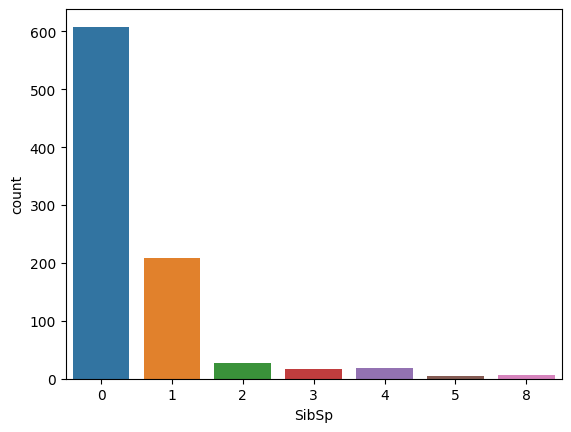

In [10]:
sns.countplot(x='SibSp', data=data)

*insight

1. Sebaran SibSp paling banyak ialah pada kelompok 0.

* **Noted**

Sebelum melakukan analisa, harus melakukan pengecekan data yg kosong pada dataset.

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*insight

1. Data yg kosong pada variabel Age & Cabin.
2. Kolom yg kosong/null dapat mengganggu proses analisa, maka dilakukan penghapusan atau pengisian data tsb.

* **Visualisasi :**

Melihat sebaran data kosong/null.

<Axes: >

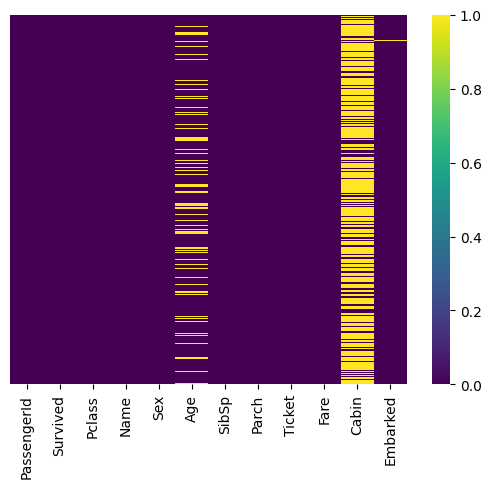

In [12]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

* **Visualisasi :**

Melihat pengelompokan data Pclass dan Age.

<Axes: xlabel='Pclass', ylabel='Age'>

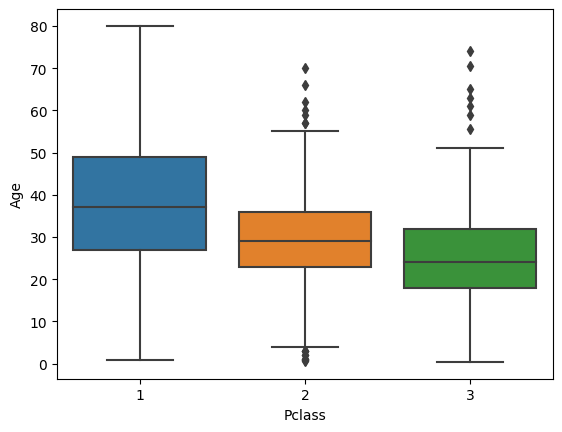

In [13]:
sns.boxplot(x='Pclass', y='Age', data=data)

*insight

1. Range umur terbanyak pada class 1 yaitu 30 - 50 tahun.
2. Range umur terbanyak pada class 2 yaitu >25 - <50 tahun.
3. Range umur terbanyak pada class 3 yaitu >20 - >30 tahun.

Kolom/variabel Cabin dihapus karena data banyak yg null.

In [14]:
data.drop('Cabin', axis=1, inplace=True)

Mencari nilai rata-rata umur dari setiap class pada kolom/variabel Pclass :

In [15]:
kelas_1 = data.loc[data['Pclass'] == 1, 'Age'].mean()
kelas_2 = data.loc[data['Pclass'] == 2, 'Age'].mean()
kelas_3 = data.loc[data['Pclass'] == 3, 'Age'].mean()

print('Rata-rata umur berdasarkan Pclass 1 : %i' %kelas_1, 'tahun')
print('Rata-rata umur berdasarkan Pclass 2 : %i' %kelas_2, 'tahun')
print('Rata-rata umur berdasarkan Pclass 3 : %i' %kelas_3, 'tahun')

Rata-rata umur berdasarkan Pclass 1 : 38 tahun
Rata-rata umur berdasarkan Pclass 2 : 29 tahun
Rata-rata umur berdasarkan Pclass 3 : 25 tahun


Data yg null pada variabel Age akan di-isi dengan nilai rata-rata umur berdasarkan Pclass :

In [16]:
# fungsi untuk
def setting_umur(cols):   #cols ialah kolom.
  Age = cols[0]
  Pclass = cols[1]

  if (pd.isnull(Age)):
    if (Pclass == 1):
      return 38
    elif (Pclass == 2):
      return 29
    elif (Pclass == 3):
      return 25
  else:
    return Age

In [17]:
data['Age'] = data[['Age', 'Pclass']].apply(setting_umur, axis=1)

Mengghapus data yg memiliki nilai null :

In [18]:
data.dropna(inplace=True)

* **Visualisasi :**

Melihat apakah masih ada data yg null.

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

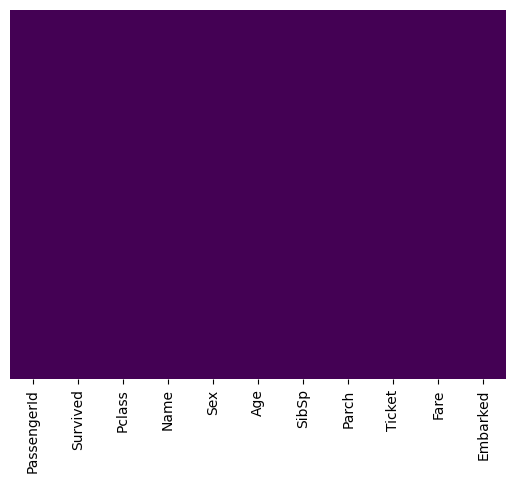

In [20]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*insight

1. Pada gambar tidak terdapat data yg null.

Membuat kolom baru berdasarkan kelompok data variabel Sex :

*Tujuan : agar mempermudah dalam prediksi karena nilai pada variabel tsb bertipe integer.

In [21]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Melakukan analisa pada Age = male :

In [22]:
jenkel = pd.get_dummies(data['Sex'], drop_first=True)
jenkel.head()

,male
0,1
1,0
2,0
3,0
4,1


Membuat kolom baru berdasarkan kelompok data variabel Embarked = Q S :

*Tujuan : agar mempermudah dalam prediksi karena nilai pada variabel tsb bertipe integer.

In [23]:
emb = pd.get_dummies(data['Embarked'])
emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
emb = pd.get_dummies(data['Embarked'], drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Membuat kolom baru berdasarkan kelompok data variabel Pclass = 2 & 3 :

*note
1. Hanya mengambil class 2 & 3 karena pada class tsb yg paling banyak memberikan korban yg tidak selamat.
2. Class 1 dihapus karena paling sedikit korban yg tidak selamat.

In [25]:
Pcl = pd.get_dummies(data['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


Menggabungkan data jenkel, emb, Pcl ke dalam dataframe data :

In [26]:
data = pd.concat([data, jenkel, emb, Pcl], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


Menghapus data yg tidak dibutuhkan :

In [27]:
data.drop(['Sex', 'Embarked', 'Pclass', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


* **Analisa dgn Linear Regression :**

Melihat hubungan variabel dependent dan independent.

*Tujuan :
1. Melakukan prediksi korban tsb selamat atau tidak selamat berdasarkan kolom2 yg ada.

In [44]:
# karena type data int pada nama variabel 2 & 3, maka kita ubah ke type data str agar bisa diproses prediksi.

data.columns = data.columns.astype(str)

In [45]:
x = data.drop('Survived', axis=1)   #var independent, seluruh var kecuali var Survived.
y = data['Survived']   #var dependent.

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
prediksi = model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediksi)

array([[143,  23],
       [ 22,  79]])

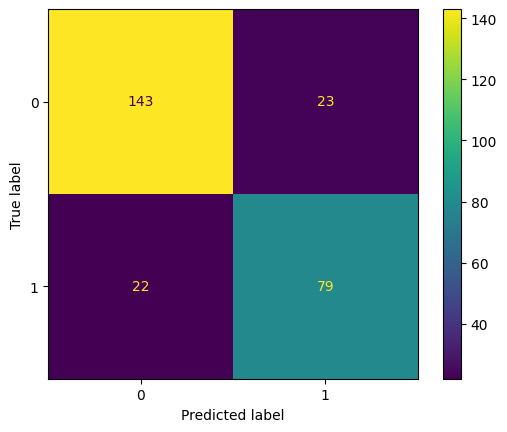

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

conf_matrix = metrics.confusion_matrix(y_test, prediksi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()

In [52]:
print(metrics.classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [29]:
import numpy as np
